In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")
# Combine the data into a single dataset
df = pd.merge(city_data, ride_data, on="city", how="outer")
# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
urban_df = df.loc[df["type"] == "Urban"]
suburban_df = df.loc[df["type"] == "Suburban"]
rural_df = df.loc[df["type"] == "Rural"]
rural_df.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [4]:
fare_table_urban = urban_df[["city", "fare"]]
city_fare_urban = fare_table_urban.groupby(["city"])
average_fare_urban = city_fare_urban.mean()

fare_table_suburban = suburban_df[["city", "fare"]]
city_fare_suburban = fare_table_suburban.groupby(["city"])
average_fare_suburban = city_fare_suburban.mean()

fare_table_rural = rural_df[["city", "fare"]]
city_fare_rural = fare_table_rural.groupby(["city"])
average_fare_rural = city_fare_rural.mean()
# average_fare_rural.head()

In [5]:
rides_table_urban = urban_df[["city", "ride_id"]]
city_rides_urban = rides_table_urban.groupby(["city"])
total_rides_urban = city_rides_urban.count()

rides_table_suburban = suburban_df[["city", "ride_id"]]
city_rides_suburban = rides_table_suburban.groupby(["city"])
total_rides_suburban = city_rides_suburban.count()

rides_table_rural = rural_df[["city", "ride_id"]]
city_rides_rural = rides_table_rural.groupby(["city"])
total_rides_rural = city_rides_rural.count()
# total_rides_urban.head()

## Bubble Plot of Ride Sharing Data

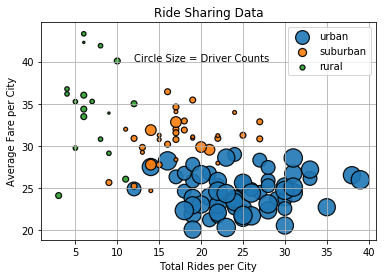

In [7]:
# Obtain the x and y coordinates for each of the three city types
x_urban = total_rides_urban["ride_id"]
y_urban = average_fare_urban["fare"]
x_suburban = total_rides_suburban["ride_id"]
y_suburban = average_fare_suburban["fare"]
x_rural = total_rides_rural["ride_id"]
y_rural = average_fare_rural["fare"]
# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, s=urban_df["driver_count"]*5, marker="o", linewidth=1.25, alpha=0.9, label="urban", edgecolors="black")
plt.scatter(x_suburban, y_suburban, s=suburban_df["driver_count"]*5, marker="o", linewidth=1.25, alpha=0.9, label="suburban", edgecolors="black")
plt.scatter(x_rural, y_rural, s=rural_df["driver_count"]*5, marker="o", linewidth=1.25, alpha=0.9, label="rural", edgecolors="black")
# Incorporate the other graph properties
plt.title("Ride Sharing Data")
plt.xlabel("Total Rides per City")
plt.ylabel("Average Fare per City")
plt.legend(loc="best")
# Incorporate a text label regarding circle size
plt.text(12,40,"Circle Size = Driver Counts")
plt.grid()
plt.savefig("./images/RideShare.png")
plt.show()

## Total Fares by City Type

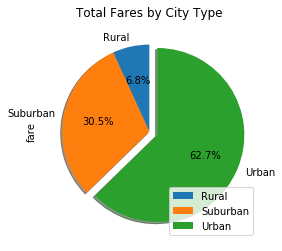

In [8]:
# Calculate Type Percents
fare_table = df[["type", "fare"]]
fare_df = fare_table.groupby(["type"])
fare_summary = fare_df.sum()

# Build Pie Chart
explode = (0,0,0.1)
fare_pie = fare_summary.plot(kind="pie", y="fare", title="Total Fares by City Type",
                            explode=explode, autopct="%1.1f%%", shadow=True, startangle=90)
# Save Figure
plt.savefig("./images/TotalFares.png")
plt.legend(loc="lower right")
plt.show()

## Total Rides by City Type

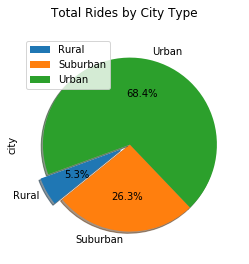

In [9]:
# Calculate Ride Percents
type_table = df[["city", "type"]]
type_df = type_table.groupby(["type"])
total_rides = type_df.count()
total_rides

# Build Pie Chart
explode = (0.1,0,0)
rides_pie = total_rides.plot(kind="pie", subplots="True", title="Total Rides by City Type",
                            explode=explode, autopct="%1.1f%%", shadow=True, startangle=200)
# Save Figure
plt.savefig("./images/TotalRides.png")
plt.legend(loc='upper left')
plt.show()

In [107]:
# Show Figure
# plt.show()

## Total Drivers by City Type

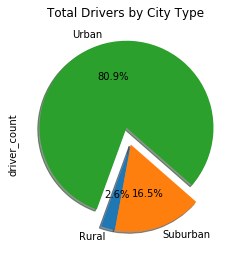

In [10]:
# Calculate Driver Percents
# city_table = df[["city", "driver_count", "type"]]
# city_df = city_table.groupby(['city'])
driver_df = city_data.groupby(['type']).sum()
# total_drivers = driver_df.keys()

driver_amount = driver_df['driver_count']

# urban_driver = 2405 
# suburban_driver = 490
# rural_driver = 78

# driver_df = pd.DataFrame({
#     "urban": [urban_driver],
#     "suburban": [suburban_driver],
#     "rural": [rural_driver]
# })
# Build Pie Charts
explode = (0,0,0.2)
driver_pie = driver_amount.plot(kind="pie", subplots="True", title="Total Drivers by City Type",
                         explode=explode, autopct="%1.1f%%", shadow=True, startangle=250)
# Save Figure
plt.savefig("./images/TotalDrivers.png")
plt.show()